In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon = pd.read_csv(r'C:\Users\mike1\Documents\amazon_cells_labelled.txt', delimiter = "\t")
amazon.columns = ["review", "rating"]

In [15]:
keywords = ['great', 'love', 'awesome', 'best', 'highly', 'excellent', 'nice', 'cool']

for key in keywords:
    amazon[str(key)] = amazon.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
amazon['exclamation'] = amazon.review.str.contains('!')

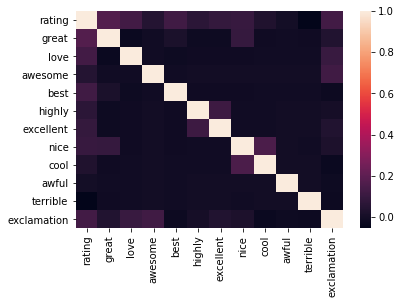

In [16]:
sns.heatmap(amazon.corr())

In [6]:
data = amazon[keywords + ['exclamation']]
target = amazon['rating']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points in amazon out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 394


In [8]:
yelp = pd.read_csv(r'C:\Users\mike1\Documents\yelp_labelled.txt', delimiter = "\t")
yelp.columns = ["review", "rating"]

In [9]:
keywords = ['great', 'love', 'awesome', 'best', 'highly', 'excellent', 'nice', 'cool']

for key in keywords:
    yelp[str(key)] = yelp.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [10]:
yelp['exclamation'] = yelp.review.str.contains('!')

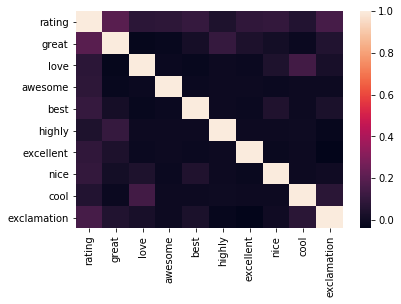

In [11]:
sns.heatmap(yelp.corr())

In [12]:
data = yelp[keywords + ['exclamation']]
target = yelp['rating']

In [13]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points in yelp out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points in yelp out of a total 999 points : 372


Both times the sentiment analysis performed fairly similar. 394 missed points in the amazon set and 372 missed pints in the yelp set. 